# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json

In [2]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [80]:
print recipes[0]
print len(recipes)

{u'cuisine': u'greek', u'id': 10259, u'ingredients': [u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']}
39774


### Составление корпуса

In [4]:
from gensim import corpora, models
import numpy as np

C:\Users\AK\Anaconda2\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [5]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [6]:
print texts[0]
print corpus[0]

[u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [7]:
np.random.seed(76543)
# здесь код для построения модели:
# обучение модель
%time ldamodel = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=40, passes=5)

Wall time: 2min 1s


In [8]:
mtopics=ldamodel.show_topics(num_topics=40, num_words=10,formatted=True)

In [9]:
mtopics

[(0,
  u'0.083*"salt" + 0.080*"cooking spray" + 0.079*"garlic cloves" + 0.064*"olive oil" + 0.064*"chopped onion" + 0.035*"fat free less sodium chicken broth" + 0.034*"crushed red pepper" + 0.034*"water" + 0.033*"black pepper" + 0.032*"ground black pepper"'),
 (1,
  u'0.130*"carrots" + 0.077*"onions" + 0.052*"cabbage" + 0.043*"spinach" + 0.040*"celery" + 0.039*"water" + 0.037*"beef" + 0.031*"low sodium chicken broth" + 0.029*"salt" + 0.026*"green cabbage"'),
 (2,
  u'0.066*"dry red wine" + 0.047*"shortening" + 0.046*"beef broth" + 0.045*"vegetable oil cooking spray" + 0.044*"grape tomatoes" + 0.039*"cilantro sprigs" + 0.035*"french bread" + 0.033*"dried rosemary" + 0.030*"all-purpose flour" + 0.030*"sun-dried tomatoes"'),
 (3,
  u'0.117*"oil" + 0.112*"potatoes" + 0.081*"salt" + 0.050*"chickpeas" + 0.049*"pepper" + 0.048*"onions" + 0.046*"rice" + 0.030*"water" + 0.029*"coriander" + 0.029*"saffron"'),
 (4,
  u'0.061*"green bell pepper" + 0.057*"garlic powder" + 0.055*"salt" + 0.054*"caye

In [35]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))
save_answers1(20,7,10,1,1,2)

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [10]:
import copy
dictionary2 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [11]:
dictionary3 = dict((k, v) for k, v in dictionary2.dfs.items() if v >= 4000)

In [12]:
#dictionary2.dfs

In [13]:
len(dictionary2)

6714

In [14]:
len(dictionary3)

12

In [15]:
dictionary2.filter_tokens(dictionary3.keys())

In [16]:
len(dictionary2)

6702

In [17]:
corpus2 = [dictionary2.doc2bow(text) for text in texts]  # составляем корпус документов

In [18]:
len1=0
for i in range(0,len(corpus)):
    len1=len1+len(corpus[i])
print len1

428249


In [19]:
len2=0
for i in range(0,len(corpus2)):
    len2=len2+len(corpus2[i])
print len2

343665


In [114]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))
save_answers2(6714, 6702, len1, len2)        

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [20]:
np.random.seed(76543)
# здесь код для построения модели:
# обучение модель
%time ldamodel2 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=40, passes=5)

Wall time: 1min 41s


In [21]:
ldamodel2.show_topics(num_topics=40, num_words=10,formatted=True)

[(0,
  u'0.116*"soy sauce" + 0.067*"green onions" + 0.058*"sesame oil" + 0.039*"ginger" + 0.037*"ground pork" + 0.032*"corn starch" + 0.032*"carrots" + 0.029*"hoisin sauce" + 0.026*"eggs" + 0.026*"sake"'),
 (1,
  u'0.093*"crushed red pepper flakes" + 0.085*"red pepper flakes" + 0.061*"crushed tomatoes" + 0.054*"chopped parsley" + 0.047*"mozzarella cheese" + 0.045*"okra" + 0.044*"andouille sausage" + 0.037*"roasted red peppers" + 0.030*"penne pasta" + 0.022*"sausage casings"'),
 (2,
  u'0.100*"boneless skinless chicken breast halves" + 0.094*"warm water" + 0.062*"active dry yeast" + 0.043*"russet potatoes" + 0.042*"taco seasoning" + 0.035*"salt and ground black pepper" + 0.033*"cannellini beans" + 0.032*"bread flour" + 0.031*"prosciutto" + 0.028*"chipotles in adobo"'),
 (3,
  u'0.079*"rice vinegar" + 0.072*"soy sauce" + 0.064*"scallions" + 0.053*"sesame seeds" + 0.052*"sesame oil" + 0.042*"honey" + 0.037*"fresh ginger" + 0.035*"green onions" + 0.033*"low sodium soy sauce" + 0.025*"carro

In [42]:
np.random.seed(76543)
tt2=ldamodel2.top_topics(corpus2)

In [43]:
ave2=0.
for i in range(0,len(tt2)):
    tmp=np.mean([y[0] for y in tt2[i][0]])
    ave2=ave2+tmp/len(tt2)
print ave2

0.0333238707105


In [44]:
np.random.seed(76543)
tt1=ldamodel.top_topics(corpus)

In [145]:
#print [y[0] for y in tt1[0][0]]
#print len([y[0] for y in tt1[0][0]])

[0.060701202478307417, 0.056556523215000848, 0.055464595931986799, 0.05364391417341325, 0.039306025072256681, 0.034363248636521453, 0.031722436012575315, 0.030095138443782553, 0.026637303062034955, 0.026198957615161857, 0.024929711377600312, 0.024071897905204271, 0.021874557131399332, 0.020369964847447675, 0.019996696146977768, 0.019901726746529493, 0.019670505251226409, 0.017446509345271165, 0.016693327304388061, 0.015958515290103673]


In [45]:
ave1=0.
for i in range(0,len(tt1)):
    tmp=np.mean([y[0] for y in tt1[i][0]])
    ave1=ave1+tmp/len(tt1)
print ave1

0.0331886654685


In [54]:
ttt=corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]

In [159]:
#print tt1[12][1]
[tt1[i][1] for i in range(0,39)]

[-437.94129330591329,
 -452.34106674331417,
 -474.53187091659169,
 -474.87064694984912,
 -487.19414208853584,
 -524.7881112336911,
 -526.73995312579916,
 -539.50125378270025,
 -547.59205214105964,
 -558.66855629321981,
 -568.34863836233842,
 -576.8558833018418,
 -583.63008627212912,
 -601.77919311697974,
 -603.83206048884756,
 -633.07840874104761,
 -647.13620545715071,
 -670.85683719899407,
 -676.31239618849145,
 -693.22912024569086,
 -703.51949876366882,
 -738.2283814312882,
 -742.22881507019031,
 -747.10109282984456,
 -779.78885207299754,
 -796.43628481195321,
 -803.57910945729566,
 -815.39923606153786,
 -832.80063704348959,
 -856.81998807999128,
 -863.39841077588278,
 -872.23052664556121,
 -874.83684025275852,
 -879.69064474004563,
 -886.44976626426057,
 -887.8147240034898,
 -890.23390063890588,
 -903.92865245207224,
 -912.13815629845226]

In [135]:
num1=0.
denom1=0.
for i in range(0,len(tt1)):
    #print [y[0] for y in tt1[i][0]]
    num1=num1+tt1[i][1]
    denom1+=1.
    #num1=num1+np.sum([y[0] for y in tt1[i][0]])
    #denom1=denom1+len(([y[0] for y in tt1[i][0]]))
print num1/denom1
print num1,denom1

num2=0.
denom2=0.
for i in range(0,len(tt2)):
    num2=num2+tt2[i][1]
    denom2+=1
    #num2=num2+np.sum([y[0] for y in tt2[i][0]])
    #denom2=denom2+len(([y[0] for y in tt2[i][0]]))
print num2/denom2
print num2,denom2

-699.455973971
-27978.2389588 40.0
-737.719024686
-29508.7609874 40.0


In [31]:
len(corpus2)

39774

In [136]:
save_answers3(-699.455973971, -737.719024686)

In [41]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))
save_answers3(ave1, ave2)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [89]:
ldamodel2.get_document_topics(corpus2[2])

[(15, 0.10249999999999998),
 (25, 0.4096538481922965),
 (31, 0.1835350639141852),
 (34, 0.21431108789351813)]

In [68]:
len(corpus2)

39774

In [65]:
nel1=0
for i in range(1,len(corpus2)):
    nel1=nel1+len(ldamodel2.get_document_topics(corpus2[i],minimum_probability=0.01))
print nel1

198110


In [72]:
len(ldamodel2.get_document_topics(corpus2[2],minimum_probability=0.01))

4

Также выведите содержимое переменной *.alpha* второй модели:

In [66]:
ldamodel2.alpha

array([ 0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025])

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [67]:
np.random.seed(76543)
# здесь код для построения модели:
# обучение модель
%time ldamodel3 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=40, passes=5,alpha=1.)

Wall time: 1min 16s


In [71]:
ldamodel3.get_document_topics(corpus2[0])

[(0, 0.021279626392366878),
 (1, 0.021276595744681659),
 (2, 0.021286173600447773),
 (3, 0.022008022469187417),
 (4, 0.021276595744680851),
 (5, 0.021302894502073795),
 (6, 0.021552747402101297),
 (7, 0.024298410684070942),
 (8, 0.021284572616274009),
 (9, 0.021369156704114729),
 (10, 0.021895624310550157),
 (11, 0.021310158685056743),
 (12, 0.021303189209601458),
 (13, 0.021276595744680851),
 (14, 0.021276595744688011),
 (15, 0.027090305484416152),
 (16, 0.021594130985335986),
 (17, 0.042603172022483753),
 (18, 0.021444014398579288),
 (19, 0.076766907256159755),
 (20, 0.021312688304181097),
 (21, 0.021276728338201805),
 (22, 0.021318466146643369),
 (23, 0.021314543273139381),
 (24, 0.021276595744680851),
 (25, 0.044848101609689855),
 (26, 0.0213034781428314),
 (27, 0.021351995449254868),
 (28, 0.043081980144801198),
 (29, 0.034944760789239825),
 (30, 0.021278288658695264),
 (31, 0.021276595744693216),
 (32, 0.022056121610135839),
 (33, 0.021382142844851567),
 (34, 0.021376736795305426

In [69]:
nel2=0
for i in range(1,len(corpus2)):
    nel2=nel2+len(ldamodel3.get_document_topics(corpus2[i],minimum_probability=0.01))
print nel2

1590920


In [70]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))
save_answers4(nel1, nel2)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [96]:
doc=list(corpus2)[31800]
ldamodel2.get_document_topics(doc)

[(2, 0.056946694465073007),
 (7, 0.092483704712055942),
 (8, 0.22361111111111109),
 (10, 0.064767872631830051),
 (27, 0.063297956758346013),
 (32, 0.11361487606842172),
 (34, 0.12012992051477552),
 (35, 0.16247030843504759),
 (37, 0.059621999747783296)]

In [110]:
len(corpus2)

39774

In [106]:
y= np.array(list([recipe["cuisine"] for recipe in recipes]))
len(y)

39774

In [98]:
print len(y), ldamodel2.num_topics

39774 40


In [102]:
dataTopicsDocs=np.zeros((len(y),ldamodel2.num_topics)) #39774*40

In [103]:
dataTopicsDocs.shape

(39774L, 40L)

In [116]:
dataTopicsDocs[2,:]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.1025    ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.40965638,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.18353106,  0.        ,  0.        ,  0.21431257,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [112]:
i=0
for bow in corpus2:
    recipe_topic = ldamodel2.get_document_topics(bow)
    for t, prob in recipe_topic:
        dataTopicsDocs[i,t] += prob
    i+=1

In [125]:
clf = RandomForestClassifier(n_estimators=100)
#clf.fit(dataTopicsDocs, y)

In [126]:
acc=cross_val_score(clf,dataTopicsDocs, y)
acc_mean=np.mean(acc)
print acc_mean

0.558330858632


In [127]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))
save_answers5(acc_mean)

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [128]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print w

### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [129]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [130]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [131]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

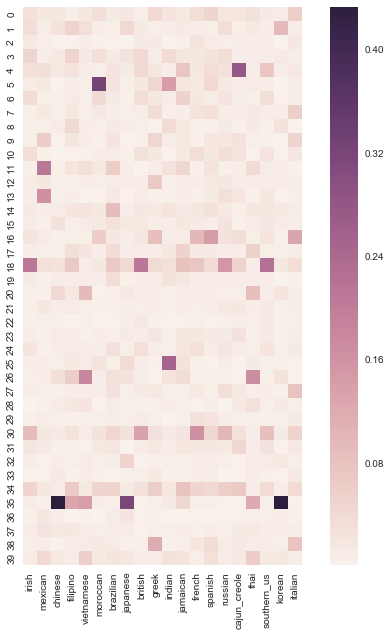

In [133]:
# Визуализируйте матрицу
plot_matrix(compute_topic_cuisine_matrix(ldamodel, corpus, recipes))

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 